In [1]:
! pip install -U langgraph

     ---------------------------------------- 85.8/85.8 kB 2.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
clave = os.getenv("SERPAPI_API_KEY")
clave

'25c03ccdb21a8fb9da509cdd2290a51fd5f4908df94e37a2bc98338c69de9b1d'

In [17]:
import os
os.getcwd()

'c:\\NuevoChatbot'

#### Introduccion a agentes

In [56]:
dir(AgentType)

['CHAT_CONVERSATIONAL_REACT_DESCRIPTION',
 'CHAT_ZERO_SHOT_REACT_DESCRIPTION',
 'CONVERSATIONAL_REACT_DESCRIPTION',
 'OPENAI_FUNCTIONS',
 'OPENAI_MULTI_FUNCTIONS',
 'REACT_DOCSTORE',
 'SELF_ASK_WITH_SEARCH',
 'STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION',
 'ZERO_SHOT_REACT_DESCRIPTION',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__members__',
 '__mod__',
 '__module__',
 '__mul__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',


In [80]:
from langchain.agents import load_tools, initialize_agent, AgentType
from langchain_groq import ChatGroq

#llm = ChatGroq(model="llama3-8b-8192") # Da error 
llm = ChatGroq(model="mixtral-8x7b-32768",) 
tools = load_tools(["llm-math"], llm=llm)
tools

[Tool(name='Calculator', description='Useful for when you need to answer questions about math.', func=<bound method Chain.run of LLMMathChain(llm_chain=LLMChain(prompt=PromptTemplate(input_variables=['question'], template='Translate a math problem into a expression that can be executed using Python\'s numexpr library. Use the output of running this code to answer the question.\n\nQuestion: ${{Question with math problem.}}\n```text\n${{single line mathematical expression that solves the problem}}\n```\n...numexpr.evaluate(text)...\n```output\n${{Output of running the code}}\n```\nAnswer: ${{Answer}}\n\nBegin.\n\nQuestion: What is 37593 * 67?\n```text\n37593 * 67\n```\n...numexpr.evaluate("37593 * 67")...\n```output\n2518731\n```\nAnswer: 2518731\n\nQuestion: 37593^(1/5)\n```text\n37593**(1/5)\n```\n...numexpr.evaluate("37593**(1/5)")...\n```output\n8.222831614237718\n```\nAnswer: 8.222831614237718\n\nQuestion: {question}\n'), llm=ChatGroq(client=<groq.resources.chat.completions.Completi

In [81]:
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)
res = agent.invoke("Multiplique 3 por 6.")
res



> Entering new AgentExecutor chain...
The question is asking me to multiply 3 by 6. I can use the Calculator tool to perform this operation.

Action: Calculator
Action Input: 3 * 6
Observation: Answer: 18
Thought:I now know the final answer.
Final Answer: The product of 3 and 6 is 18.

> Finished chain.


{'input': 'Multiplique 3 por 6.', 'output': 'The product of 3 and 6 is 18.'}

#### Herramientas preconfiguradas

#### Wikipedia

In [30]:
!pip install -U langgraph

   ---------------------------------------- 0.0/102.6 kB ? eta -:--:--
   ---------------------------------------- 102.6/102.6 kB 3.0 MB/s eta 0:00:00


In [1]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=100)
tool = WikipediaQueryRun(api_wrapper=api_wrapper)
print('Nombre: ', tool.name)
print("***************************************")
print('Descripcion: ',tool.description)
print("***************************************")
print('Argumentos: ', tool.args)
print("***************************************")
print('Devolver la salida al usuario: ',tool.return_direct)

print(tool.args["query"].keys())

Nombre:  wikipedia
***************************************
Descripcion:  A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
***************************************
Argumentos:  {'query': {'title': 'Query', 'description': 'query to look up on wikipedia', 'type': 'string'}}
***************************************
Devolver la salida al usuario:  False
dict_keys(['title', 'description', 'type'])


In [30]:
tool.invoke({"query": "langchain"})


'Page: LangChain\nSummary: LangChain is a framework designed to simplify the creation of applications '

In [31]:
tool.invoke("langchain")

'Page: LangChain\nSummary: LangChain is a framework designed to simplify the creation of applications '

In [46]:
!pip install langchainhub

  Using cached langchainhub-0.1.20-py3-none-any.whl.metadata (659 bytes)


#### Agente de busqueda con Tavily

In [ ]:
!pip install tavily-python

In [17]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults(max_results=2) # Instanciar la herramienta
#Invocar la herramienta con una consulta.
search_results = search.invoke("Cual es el clima en Tucuman, Argentina?")   
print(search_results)

[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.78, 'lon': -122.42, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1721851527, 'localtime': '2024-07-24 13:05'}, 'current': {'last_updated_epoch': 1721851200, 'last_updated': '2024-07-24 13:00', 'temp_c': 21.6, 'temp_f': 71.0, 'is_day': 1, 'condition': {'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}, 'wind_mph': 9.8, 'wind_kph': 15.8, 'wind_degree': 253, 'wind_dir': 'WSW', 'pressure_mb': 1017.0, 'pressure_in': 30.03, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 59, 'cloud': 6, 'feelslike_c': 21.6, 'feelslike_f': 71.0, 'windchill_c': 21.6, 'windchill_f': 71.0, 'heatindex_c': 24.2, 'heatindex_f': 75.5, 'dewpoint_c': 13.5, 'dewpoint_f': 56.3, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 6.0, 'gust_mph': 15.8, 'gust_kph': 25.4}}"}, {'url': 'https://forecast.weather.gov/zipcity.php?inpu

In [28]:
# Empleando un LLM
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
# Instanciar un LLM
modelo = ChatGroq(model="llama3-8b-8192")
# Crear una lista con las herramientas que se van a usar
tools = [search]

# Acoplar el LLM con herramientas empleando bind_tools
llm_herramienta = modelo.bind_tools(tools)
res = llm_herramienta.invoke([HumanMessage(content="Cual es el clima en Tucuman, Argentina?")])
res.tool_calls


ContentString: 
ToolCalls: [{'name': 'tavily_search_results_json', 'args': {'query': 'clima en Tucumán, Argentina'}, 'id': 'call_15mp', 'type': 'tool_call'}]


[{'name': 'tavily_search_results_json',
  'args': {'query': 'clima en Tucumán, Argentina'},
  'id': 'call_15mp',
  'type': 'tool_call'}]

In [43]:
# Instalar LangGraph con pip install langgraph
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(modelo, tools)
respuesta = agent_executor.invoke(
    {"messages": [HumanMessage(content="Cual es el clima en Tucuman, Argentina?")]}
)
#print(respuesta)   # Revisar la estructura de la respuesta
respuesta["messages"][3].content

'El clima en Tucumán, Argentina es subtropical, con inviernos muy suaves y secos y veranos cálidos y lluviosos. Los meses más lluviosos son los de verano, especialmente enero. La ciudad se encuentra en el norte de Argentina, a una latitud de 27 grados sur, a una altura de 440 metros y al pie de los Andes.'

#### Herramientas personalizadas

##### Crear una herramienta

In [69]:
from langchain_core.tools import tool


@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int

print(multiply.name)
print(multiply.description)
print(multiply.args)



multiply
Multiply two integers together.
{'first_int': {'title': 'First Int', 'type': 'integer'}, 'second_int': {'title': 'Second Int', 'type': 'integer'}}


In [70]:
multiply.invoke({"first_int": 4, "second_int": 5})

20

##### Conectarla con un LLM

In [71]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="mixtral-8x7b-32768")
llm_with_tools = llm.bind_tools([multiply])
msg = llm_with_tools.invoke("whats 5 times forty two")
msg.tool_calls

[{'name': 'multiply',
  'args': {'first_int': 5, 'second_int': 42},
  'id': 'call_913y'}]

In [72]:
from operator import itemgetter

chain = llm_with_tools | (lambda x: x.tool_calls[0]["args"]) | multiply
chain.invoke("What's four times 23")

92

#### Crear múltiples herramientas

In [ ]:

from langchain_core.tools import tool


@tool
def multiply(first_int: int, second_int: int) -> int:
    """Multiply two integers together."""
    return first_int * second_int
    
@tool
def add(first_int: int, second_int: int) -> int:
    "Add two integers."
    return first_int + second_int


@tool
def exponentiate(base: int, exponent: int) -> int:
    "Exponentiate the base to the exponent power."
    return base**exponent


tools = [multiply, add, exponentiate]

#### Algebra con agentes

In [39]:
!pip install numexpr

   ---------------------------------------- 0.0/141.2 kB ? eta -:--:--
   ------------------------------------- -- 133.1/141.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 141.2/141.2 kB 2.1 MB/s eta 0:00:00


In [52]:
# Preparativos
from langchain_groq import ChatGroq
from langchain import hub
from langchain.agents import AgentExecutor, create_react_agent

llm = ChatGroq(model="mixtral-8x7b-32768")

##### Compilar las herramientas

In [ ]:
prompt = hub.pull("hwchase17/react")
tools = load_tools(
    ['llm-math'],
    llm=llm
)
model = llm

##### Construir el agente

In [ ]:
agent = create_react_agent(model, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools)

In [60]:
response = agent_executor.invoke({"input": "5 * 8"})
print(response)

{'input': '5 * 8', 'output': 'The answer to 5 * 8 is 40.'}


In [61]:
res = agent_executor.invoke({"input":"Si Juana tiene 4 manzanas y Jorge trae 2.5 cajas con 8 manzanas cada una, ¿cuantas manzanas tienen Juana y Jorge?"})
res

{'input': 'Si Juana tiene 4 manzanas y Jorge trae 2.5 cajas con 8 manzanas cada una, ¿cuantas manzanas tienen Juana y Jorge?',
 'output': 'Juanana and Jorge have 24.0 apples in total.'}

#### Calculos
Conversor de divisas

In [63]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.agents import AgentType
from langchain_groq import ChatGroq

model = ChatGroq(model="mixtral-8x7b-32768")
prompt = hub.pull("hwchase17/react")
tools = load_tools(["serpapi", "llm-math"], llm=model)
agent = create_react_agent(model, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools)

In [68]:
res = agent_executor.invoke({"input" : "Primero calcula la cotizacion del peso argentino en dolares. Luego calcula cuantos dolares obtengo con 1300000 pesos argentinos."})
res

{'input': 'Primero calcula la cotizacion del peso argentino en dolares. Luego calcula cuantos dolares obtengo con 1300000 pesos argentinos.',
 'output': 'With 1,300,000 Argentine Pesos, you can get 1430.0 US Dollars.'}

#### Herramienta de calculo personalizada

In [34]:
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain_groq import ChatGroq

llm = ChatGroq(model="mixtral-8x7b-32768")

)
# initialize conversational memory
conversational_memory = ConversationBufferWindowMemory(
    memory_key='chat_history',
    k=5,
    return_messages=True
)

In [35]:
from langchain.agents import initialize_agent

tools = [CircumferenceTool()]

# initialize agent with tools
agent = initialize_agent(
    agent='chat-conversational-react-description',
    tools=tools,
    llm=llm,
    verbose=True,
    max_iterations=3,
    early_stopping_method='generate',
    memory=conversational_memory
)
agent("can you calculate the circumference of a circle that has a radius of 7.81mm")

NameError: name 'CircumferenceTool' is not defined

##### Correccion

In [ ]:
# existing prompt
print(agent.agent.llm_chain.prompt.messages[0].prompt.template)

In [ ]:
sys_msg = """Assistant is a large language model trained by OpenAI.

Assistant is designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, Assistant is able to generate human-like text based on the input it receives, allowing it to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

Assistant is constantly learning and improving, and its capabilities are constantly evolving. It is able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. Additionally, Assistant is able to generate its own text based on the input it receives, allowing it to engage in discussions and provide explanations and descriptions on a wide range of topics.

Unfortunately, Assistant is terrible at maths. When provided with math questions, no matter how simple, assistant always refers to it's trusty tools and absolutely does NOT try to answer math questions by itself

Overall, Assistant is a powerful system that can help with a wide range of tasks and provide valuable insights and information on a wide range of topics. Whether you need help with a specific question or just want to have a conversation about a particular topic, Assistant is here to assist.
"""

In [ ]:
# update our prompt
new_prompt = agent.agent.create_prompt(
    system_message=sys_msg,
    tools=tools
)

agent.agent.llm_chain.prompt = new_prompt

In [ ]:
agent("can you calculate the circumference of a circle that has a radius of 7.81mm")

#### Busqueda con SerpAPI

In [51]:
from langchain.agents import Tool
from langchain.agents import AgentType
from langchain.memory import ConversationBufferMemory
from langchain_groq import ChatGroq
from langchain.utilities import SerpAPIWrapper
from langchain.agents import initialize_agent
from langchain_core.output_parsers import StrOutputParser

search = SerpAPIWrapper()
tools = [
	Tool(
	name = "Current Search",
	func=search.run,
	description="useful for when you need to answer questions about current events or the current state of the world"
	),
]
# Agregar memoria sobre intercambios pasados
memory = ConversationBufferMemory(memory_key="chat_history")
llm = ChatGroq(model="mixtral-8x7b-32768")
agent_chain = initialize_agent(tools, llm,agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION, 
		verbose=True, memory=memory)

query="Describe el clima actual en Tucuman, Argentina."

agent_chain.invoke(query)




> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: Current Search
Action Input: Current weather in Tucuman, Argentina
Observation: {'type': 'weather_result', 'temperature': '56', 'unit': 'Fahrenheit', 'precipitation': '1%', 'humidity': '43%', 'wind': '6 mph', 'location': 'San Miguel de Tucumán, Tucumán Province, Argentina', 'date': 'Monday 7:00 PM', 'weather': 'Clear'}
Thought:Do I need to use a tool? No
AI: The current weather in Tucuman, Argentina is clear with a temperature of 56 Fahrenheit, 1% precipitation, 43% humidity, and 6 mph wind.

> Finished chain.


{'input': 'Describe el clima actual en Tucuman, Argentina.',
 'chat_history': '',
 'output': 'The current weather in Tucuman, Argentina is clear with a temperature of 56 Fahrenheit, 1% precipitation, 43% humidity, and 6 mph wind.'}

**LangGraph**

*Breve introduccion a Agents y LangGraph. Motivar un segundo curso mas avanzado enfocado en agentes y deployment de aplicaciones LLM.*

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [40]:
from langchain_groq import ChatGroq
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph import END, MessageGraph

model = ChatGroq(model="llama3-8b-8192",
                 temperature=0)

graph = MessageGraph()

graph.add_node("oracle", model)
graph.add_edge("oracle", END) # END es un nodo especial que indica el final del grafo

graph.set_entry_point("oracle")

runnable = graph.compile()

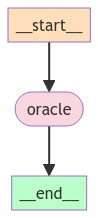

In [41]:
from IPython.display import Image, display

# visualicemos el grafo que hemos construido
try:
    display(Image(runnable.get_graph(xray=True).draw_mermaid_png()))
except:
    pass

In [42]:
runnable.invoke(HumanMessage("What is 1 + 1?"))

[HumanMessage(content='What is 1 + 1?', id='c8e198d1-9bda-41d1-9b1f-01995f5d4932'),
 AIMessage(content='The answer to 1 + 1 is 2.', response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 18, 'total_tokens': 30, 'completion_time': 0.009435785, 'prompt_time': 0.004061245, 'queue_time': None, 'total_time': 0.01349703}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_db3d7402ee', 'finish_reason': 'stop', 'logprobs': None}, id='run-a75c194a-b2c3-4f5e-a0dd-037caaba1bcb-0')]

In [43]:
runnable.invoke(HumanMessage("What is 1 + 1?"))[1].content

'The answer to 1 + 1 is 2.'

In [44]:
from langchain_core.pydantic_v1 import BaseModel, Field


# Notar que los docstrings de las clases son usados como descripción de los campos y es pasado al modelo para describir el proposito de la clase
class Add(BaseModel):
    """Add two integers together."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")


class Multiply(BaseModel):
    """Multiply two integers together."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")


tools = [Add, Multiply]

In [45]:
llm_with_tools = model.bind_tools(tools)

query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls

[{'name': 'Multiply', 'args': {'a': 3, 'b': 12}, 'id': 'call_yc3p'},
 {'name': 'Add', 'args': {'a': 11, 'b': 49}, 'id': 'call_hcta'}]

In [46]:
llm_with_tools.invoke(query)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_wag5', 'function': {'arguments': '{"a":3,"b":12}', 'name': 'Multiply'}, 'type': 'function'}, {'id': 'call_y038', 'function': {'arguments': '{"a":11,"b":49}', 'name': 'Add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 138, 'prompt_tokens': 1076, 'total_tokens': 1214, 'completion_time': 0.109590886, 'prompt_time': 0.209192021, 'queue_time': None, 'total_time': 0.318782907}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_db3d7402ee', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-566829f0-6a9f-4d45-91ba-be0b569a8476-0', tool_calls=[{'name': 'Multiply', 'args': {'a': 3, 'b': 12}, 'id': 'call_wag5'}, {'name': 'Add', 'args': {'a': 11, 'b': 49}, 'id': 'call_y038'}])